# Предобработка данных

In [3]:
import pandas as pd

# Загрузка данных из CSV файла
data = pd.read_csv('C:/Users/yegor/Desktop/BI/dataset.csv')

# # 1. Обзор данных
# print("Обзор данных:")
# print(data.head())
# print("\nИнформация о данных:")
# print(data.info())
# print("\nСтатистическое описание:")
# print(data.describe())
# # 3. Обработка пропущенных значений
# # Проверка на пропущенные значения
# print("Количество пропущенных значений перед обработкой:")
# print(data.isnull().sum())

# # Заполнение пропущенных значений средним значением по столбцу
# data['Количество участников'].fillna(data['Количество участников'].mean(), inplace=True)
# data['Средний балл'].fillna(data['Средний балл'].mean(), inplace=True)

# 4. Определение критических значений из пропущенных
# Если пропущенные значения превышают 20% от общего количества, это может быть критическим
threshold = 0.20 * len(data)
critical_missing = data.isnull().sum() > threshold
print("Критические пропущенные значения:")
print(critical_missing)

# 5. Выявление конкурсов с низким средним баллом
low_score_threshold = 20
low_score_competitions = data[data['Средний балл'] < low_score_threshold]
print("\nКонкурсы с низким средним баллом (<20):")
print(low_score_competitions[['Конкурс', 'Средний балл']])

# # 5. Оценка погрешности при допустимом количестве пропущенных значений
# # Если пропущенные значения были заменены средними, то погрешность можно оценить
# # Например, можно рассчитать стандартное отклонение
# std_dev = data['Средний балл'].std()
# print(f"Стандартное отклонение среднего балла: {std_dev}")

 
# # 7. Оценка качества данных
# # Проверка на дубликаты
# duplicates = data.duplicated().sum()
# print(f"Количество дубликатов: {duplicates}")

# # 8. Обработка дубликатов
# data.drop_duplicates(inplace=True)
# # обработка пропущенных значений
# # 1. Очистка данных от ошибок и аномалий
# # Удаление строк с отрицательными значениями в столбце "Средний балл"
# data = data[data['Средний балл'] >= 0]

# # 2. Удаление столбцов, где количество участников равно 0
# data = data[data['Количество участников'] > 0]
# # 6. Преобразование типов данных
# # Преобразование столбца "Количество участников" в целочисленный тип
# data['Количество участников'] = data['Количество участников'].astype(int)

# # Сохранение очищенных данных в новый CSV файл
# data.to_csv('cleaned_data1.csv', index=False)

print("Предобработка данных завершена. Очищенные данные сохранены в 'cleaned_data.csv'.")

Критические пропущенные значения:
Район                    False
Конкурс                  False
Год                      False
Количество участников    False
Средний балл             False
Необходимые знания       False
dtype: bool

Конкурсы с низким средним баллом (<20):
                 Конкурс  Средний балл
2     Английский язык_РЭ     19.530000
4     Английский язык_ШЭ    -27.782195
10         Астрономия_РЭ     14.950000
20           Биология_ШЭ      8.810000
25          География_МЭ     19.840000
...                  ...           ...
4621        География_РЭ     15.040000
4622            Химия_МЭ     17.940000
4623          История_МЭ      8.970000
4624   Китайский язык_ШЭ     12.650000
4629       Литература_МЭ     18.200000

[1288 rows x 2 columns]
Предобработка данных завершена. Очищенные данные сохранены в 'cleaned_data.csv'.


На основании предоставленных вами данных и результатов анализа, можно провести оценку качества данных, выделив ключевые аспекты, которые требуют внимания. Давайте рассмотрим основные моменты:

1. Обзор данных
Структура данных: Набор данных состоит из 4630 записей и 6 столбцов. Столбцы включают:
Район: категориальный, содержит названия районов.
Конкурс: категориальный, содержит названия конкурсов.
Год: числовой, год проведения конкурса.
Количество участников: числовой, количество участников в конкурсе (с пропусками).
Средний балл: числовой, средний балл участников (с пропусками и отрицательными значениями).
Необходимые знания: текстовый, описывает необходимые знания для участия в конкурсе.
2. Пропущенные значения
Количество пропущенных значений: В столбце Количество участников есть 151 пропущенное значение, а в столбце Средний балл — 31 пропущенное значение. Однако критических пропусков (более 20% от общего количества) не обнаружено.


3. Отрицательные значения
Средний балл: В столбце Средний балл есть отрицательные значения (например, -27.782195). Это может указывать на ошибки в данных или неправильные расчеты.


4. Дубликаты
Количество дубликатов: Обнаружено 54 дубликата, которые были удалены.

5. Уникальные значения
Категориальные столбцы: Уникальные значения в столбцах Район и Конкурс выглядят корректно, но стоит проверить, нет ли опечаток или несоответствий в названиях.


6. Преобразование типов данных
Типы данных: Столбец Количество участников был успешно преобразован в целочисленный тип.


7. Общая оценка качества данных
Качество данных: В целом, данные имеют приемлемое качество, но есть несколько областей, требующих внимания:
Пропущенные значения в числовых столбцах.
Отрицательные значения в столбце Средний балл.
Наличие дубликатов.
Проверка уникальности и стандартизации категориальных значений

качество данных

In [11]:
import pandas as pd

# Загрузка данных из CSV файла до обработки
data = pd.read_csv('C:/Users/yegor/Desktop/BI/dataset.csv')
# 1. Подсчет количества значений для каждого поля
count_values = data.count()
print("Количество значений для каждого поля:")
print(count_values)

# 2. Подсчет общего количества значений
# Общее количество значений = количество строк * количество столбцов
total_values = data.size
print(f"\nОбщее количество значений в наборе данных: {total_values}")

# 3. Подсчет количества значений с учетом пропущенных
# Общее количество значений с учетом пропущенных
total_values_with_nan = data.isnull().sum().sum() + total_values
print(f"Общее количество значений с учетом пропущенных: {total_values_with_nan}")
# Подсчет количества пустых значений для каждого поля
missing_values = data.isnull().sum()

# Вывод результатов
print("Количество пустых значений для каждого поля:")
print(missing_values)

# Загрузка данных из CSV файла после обработки
data_two = pd.read_csv('C:/Users/yegor/Desktop/BI/ModuleA/cleaned_data1.csv')

# 1. Количество строк и столбцов
num_rows, num_columns = data_two.shape
print(f"\nКоличество строк и столбцов (после обработки): {num_rows} строк, {num_columns} столбцов")

# 2. Диапазон значений для числовых столбцов
print("\nДиапазон значений для числовых столбцов (после обработки):")
print(data_two.describe())

# 3. Типы данных для каждого столбца
print("\nТипы данных для каждого столбца (после обработки):")
print(data_two.dtypes)
# 1. Подсчет количества значений для каждого поля
count_values = data_two.count()
print("Количество значений для каждого поля:")
print(count_values)

# 2. Подсчет общего количества значений
# Общее количество значений = количество строк * количество столбцов
total_values = data_two.size
print(f"\nОбщее количество значений в наборе данных: {total_values}")

# 3. Подсчет количества значений с учетом пропущенных
# Общее количество значений с учетом пропущенных
total_values_with_nan = data_two.isnull().sum().sum() + total_values
print(f"Общее количество значений с учетом пропущенных: {total_values_with_nan}")
# Подсчет количества пустых значений для каждого поля
missing_values = data_two.isnull().sum()

# Вывод результатов
print("Количество пустых значений для каждого поля:")
print(missing_values)
 

Количество значений для каждого поля:
Район                    4630
Конкурс                  4630
Год                      4630
Количество участников    4479
Средний балл             4599
Необходимые знания       4630
dtype: int64

Общее количество значений в наборе данных: 27780
Общее количество значений с учетом пропущенных: 27962
Количество пустых значений для каждого поля:
Район                      0
Конкурс                    0
Год                        0
Количество участников    151
Средний балл              31
Необходимые знания         0
dtype: int64

Количество строк и столбцов (после обработки): 4299 строк, 6 столбцов

Диапазон значений для числовых столбцов (после обработки):
               Год  Количество участников  Средний балл
count  4299.000000            4299.000000   4299.000000
mean   2023.500349             124.665736     28.751400
std       0.500058              71.931823     11.151085
min    2023.000000               1.000000      5.210000
25%    2023.000000    

сделать тектсовое описание для каждого атрибута
Выполнено исследование данных
Вывести диапозон значений, количество строк и столбцов, типы данных
Для каждого атрибута присутствует информация о количестве пустых значений
Подготовлен файл с данными в формате csv или xlsx 



# Для Себя

Критические значения

    Район             Конкурс   Год  Количество участников  Средний балл  \
0  Район1  Английский язык_ШЭ  2023                  244.0     44.300000   
1  Район1  Английский язык_МЭ  2023                  106.0     28.710000   
2  Район1  Английский язык_РЭ  2023                   68.0     19.530000   
3  Район1  Английский язык_ЗЭ  2023                  227.0     46.880000   
4  Район1  Английский язык_ШЭ  2024                  122.0    -27.782195   

                                  Необходимые знания  
0  Знание основ английского языка, включая грамма...  
1  Разговорный английский на среднем уровне, навы...  
2  Чтение и глубокое понимание сложных текстов, н...  
3  Письмо и составление различных текстов, включа...  
4  Углубленное знание грамматики, расширенный сло...  
Общее количество участников по годам:
Год
2023    278374.591522
2024    274007.470783
Name: Количество участников, dtype: float64

Средний балл по годам:
Год
2023    28.068756
2024    27.802482
Name: Средний балл,

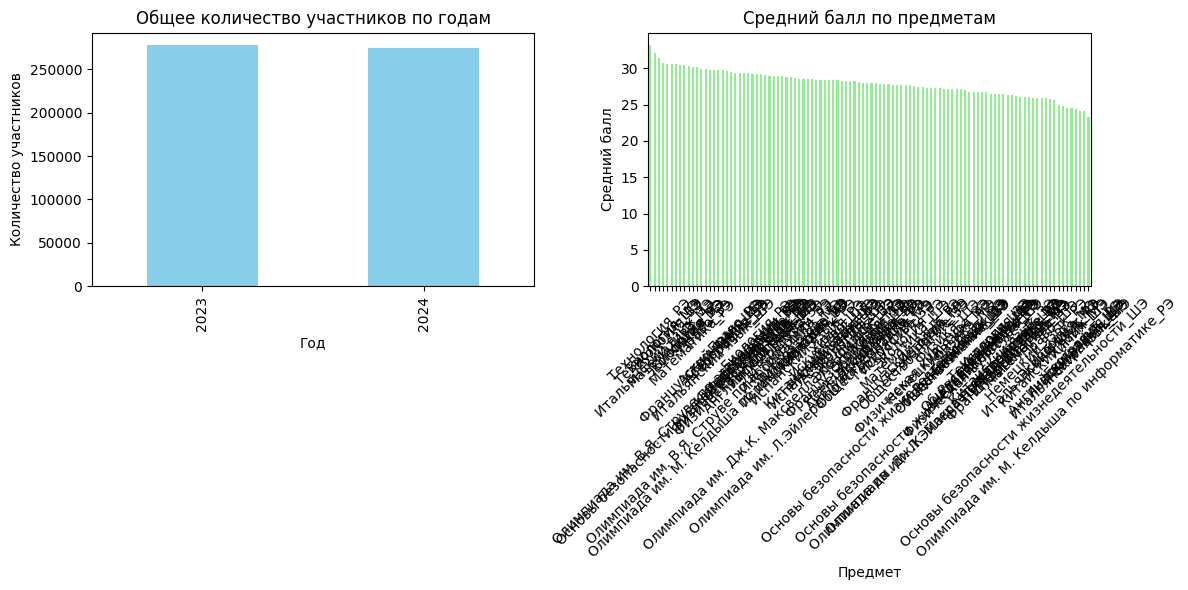


Конкурсы с низким средним баллом (<20):
                 Конкурс  Средний балл
2     Английский язык_РЭ     19.530000
4     Английский язык_ШЭ    -27.782195
10         Астрономия_РЭ     14.950000
20           Биология_ШЭ      8.810000
25          География_МЭ     19.840000
...                  ...           ...
4621        География_РЭ     15.040000
4622            Химия_МЭ     17.940000
4623          История_МЭ      8.970000
4624   Китайский язык_ШЭ     12.650000
4629       Литература_МЭ     18.200000

[1288 rows x 2 columns]

Количество конкурсов с низким средним баллом (<20): 1288


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных из CSV файла
data = pd.read_csv('C:/Users/yegor/Desktop/BI/dataset.csv')

# Просмотр первых нескольких строк данных
print(data.head())

# 1. Общее количество участников по годам
participants_per_year = data.groupby('Год')['Количество участников'].sum()
print("Общее количество участников по годам:")
print(participants_per_year)

# 2. Средний балл по годам
average_score_per_year = data.groupby('Год')['Средний балл'].mean()
print("\nСредний балл по годам:")
print(average_score_per_year)

# 3. Анализ по предметам
average_score_per_subject = data.groupby('Конкурс')['Средний балл'].mean().sort_values(ascending=False)
print("\nСредний балл по предметам:")
print(average_score_per_subject)

# 4. Визуализация данных
plt.figure(figsize=(12, 6))

# График общего количества участников по годам
plt.subplot(1, 2, 1)
participants_per_year.plot(kind='bar', color='skyblue')
plt.title('Общее количество участников по годам')
plt.xlabel('Год')
plt.ylabel('Количество участников')

# График среднего балла по предметам
plt.subplot(1, 2, 2)
average_score_per_subject.plot(kind='bar', color='lightgreen')
plt.title('Средний балл по предметам')
plt.xlabel('Предмет')
plt.ylabel('Средний балл')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 5. Выявление конкурсов с низким средним баллом
low_score_threshold = 20
low_score_competitions = data[data['Средний балл'] < low_score_threshold]
print("\nКонкурсы с низким средним баллом (<20):")
print(low_score_competitions[['Конкурс', 'Средний балл']])

# 6. Количество конкурсов с низким средним баллом
low_score_count = low_score_competitions.shape[0]
print(f"\nКоличество конкурсов с низким средним баллом (<20): {low_score_count}")